In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [3]:
df = pd.read_csv('/content/personality_datasert.csv')

In [4]:
df

,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
0,4.0,No,4.0,6.0,No,13.0,5.0,Extrovert
1,9.0,Yes,0.0,0.0,Yes,0.0,3.0,Introvert
2,9.0,Yes,1.0,2.0,Yes,5.0,2.0,Introvert
3,0.0,No,6.0,7.0,No,14.0,8.0,Extrovert
4,3.0,No,9.0,4.0,No,8.0,5.0,Extrovert
...,...,...,...,...,...,...,...,...
2895,3.0,No,7.0,6.0,No,6.0,6.0,Extrovert
2896,3.0,No,8.0,3.0,No,14.0,9.0,Extrovert
2897,4.0,Yes,1.0,1.0,Yes,4.0,0.0,Introvert
2898,11.0,Yes,1.0,3.0,Yes,2.0,0.0,Introvert


In [5]:
df.shape

(2900, 8)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2900 entries, 0 to 2899
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Time_spent_Alone           2900 non-null   float64
 1   Stage_fear                 2900 non-null   object 
 2   Social_event_attendance    2900 non-null   float64
 3   Going_outside              2900 non-null   float64
 4   Drained_after_socializing  2900 non-null   object 
 5   Friends_circle_size        2900 non-null   float64
 6   Post_frequency             2900 non-null   float64
 7   Personality                2900 non-null   object 
dtypes: float64(5), object(3)
memory usage: 181.4+ KB


In [7]:
df.describe()

,Time_spent_Alone,Social_event_attendance,Going_outside,Friends_circle_size,Post_frequency
count,2900.000000,2900.000000,2900.000000,2900.000000,2900.000000
mean,4.505816,3.963354,3.000000,6.268863,3.564727
std,3.441180,2.872608,2.221597,4.232340,2.893587
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,2.000000,1.000000,3.000000,1.000000
50%,4.000000,3.963354,3.000000,5.000000,3.000000
75%,7.000000,6.000000,5.000000,10.000000,6.000000
max,11.000000,10.000000,7.000000,15.000000,10.000000


In [8]:
df.count()

,0
Time_spent_Alone,2900
Stage_fear,2900
Social_event_attendance,2900
Going_outside,2900
Drained_after_socializing,2900
Friends_circle_size,2900
Post_frequency,2900
Personality,2900


In [9]:
df.isnull().sum()

,0
Time_spent_Alone,0
Stage_fear,0
Social_event_attendance,0
Going_outside,0
Drained_after_socializing,0
Friends_circle_size,0
Post_frequency,0
Personality,0


In [10]:
df.duplicated().sum()

np.int64(402)

In [11]:
df.drop_duplicates(inplace=True)

In [12]:
df.shape

(2498, 8)

In [13]:
df

,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
0,4.0,No,4.0,6.0,No,13.0,5.000000,Extrovert
1,9.0,Yes,0.0,0.0,Yes,0.0,3.000000,Introvert
2,9.0,Yes,1.0,2.0,Yes,5.0,2.000000,Introvert
3,0.0,No,6.0,7.0,No,14.0,8.000000,Extrovert
4,3.0,No,9.0,4.0,No,8.0,5.000000,Extrovert
...,...,...,...,...,...,...,...,...
2894,0.0,No,9.0,3.0,No,12.0,3.564727,Extrovert
2896,3.0,No,8.0,3.0,No,14.0,9.000000,Extrovert
2897,4.0,Yes,1.0,1.0,Yes,4.0,0.000000,Introvert
2898,11.0,Yes,1.0,3.0,Yes,2.0,0.000000,Introvert


In [14]:
df['Time_spent_Alone'].unique()

array([ 4.      ,  9.      ,  0.      ,  3.      ,  1.      ,  2.      ,
       10.      ,  6.      ,  5.      ,  8.      ,  4.505816,  7.      ,
       11.      ])

<Axes: xlabel='Personality', ylabel='Count'>

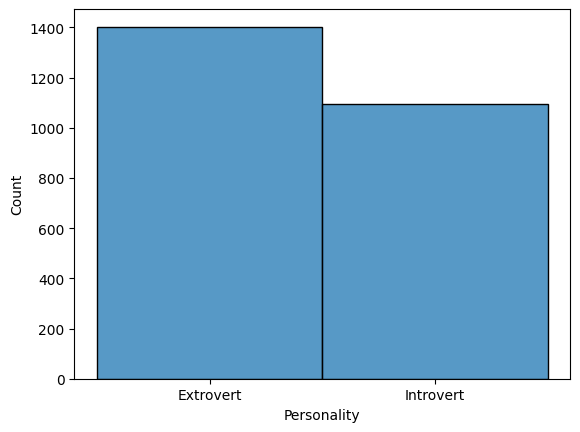

In [15]:
sns.histplot(df['Personality'])

<Axes: ylabel='Personality'>

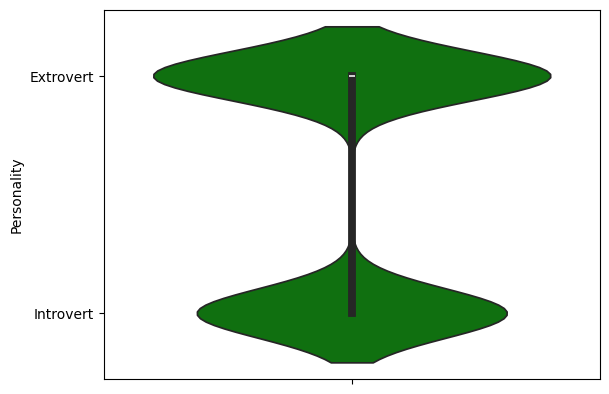

In [16]:
sns.violinplot(df['Personality'],color='green')

<Axes: xlabel='Going_outside', ylabel='Time_spent_Alone'>

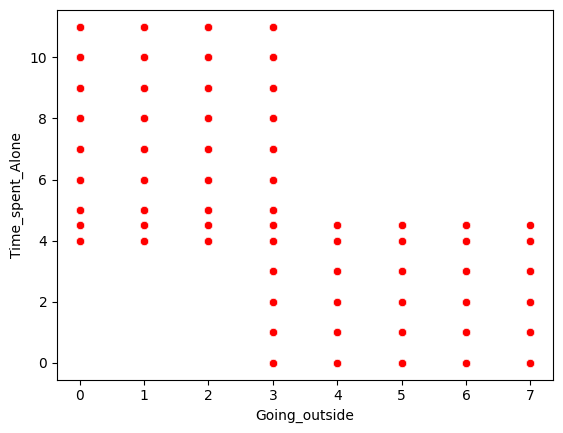

In [17]:
sns.scatterplot(x=df['Going_outside'],y=df['Time_spent_Alone'],data=df,color='red')

In [18]:
df

,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
0,4.0,No,4.0,6.0,No,13.0,5.000000,Extrovert
1,9.0,Yes,0.0,0.0,Yes,0.0,3.000000,Introvert
2,9.0,Yes,1.0,2.0,Yes,5.0,2.000000,Introvert
3,0.0,No,6.0,7.0,No,14.0,8.000000,Extrovert
4,3.0,No,9.0,4.0,No,8.0,5.000000,Extrovert
...,...,...,...,...,...,...,...,...
2894,0.0,No,9.0,3.0,No,12.0,3.564727,Extrovert
2896,3.0,No,8.0,3.0,No,14.0,9.000000,Extrovert
2897,4.0,Yes,1.0,1.0,Yes,4.0,0.000000,Introvert
2898,11.0,Yes,1.0,3.0,Yes,2.0,0.000000,Introvert


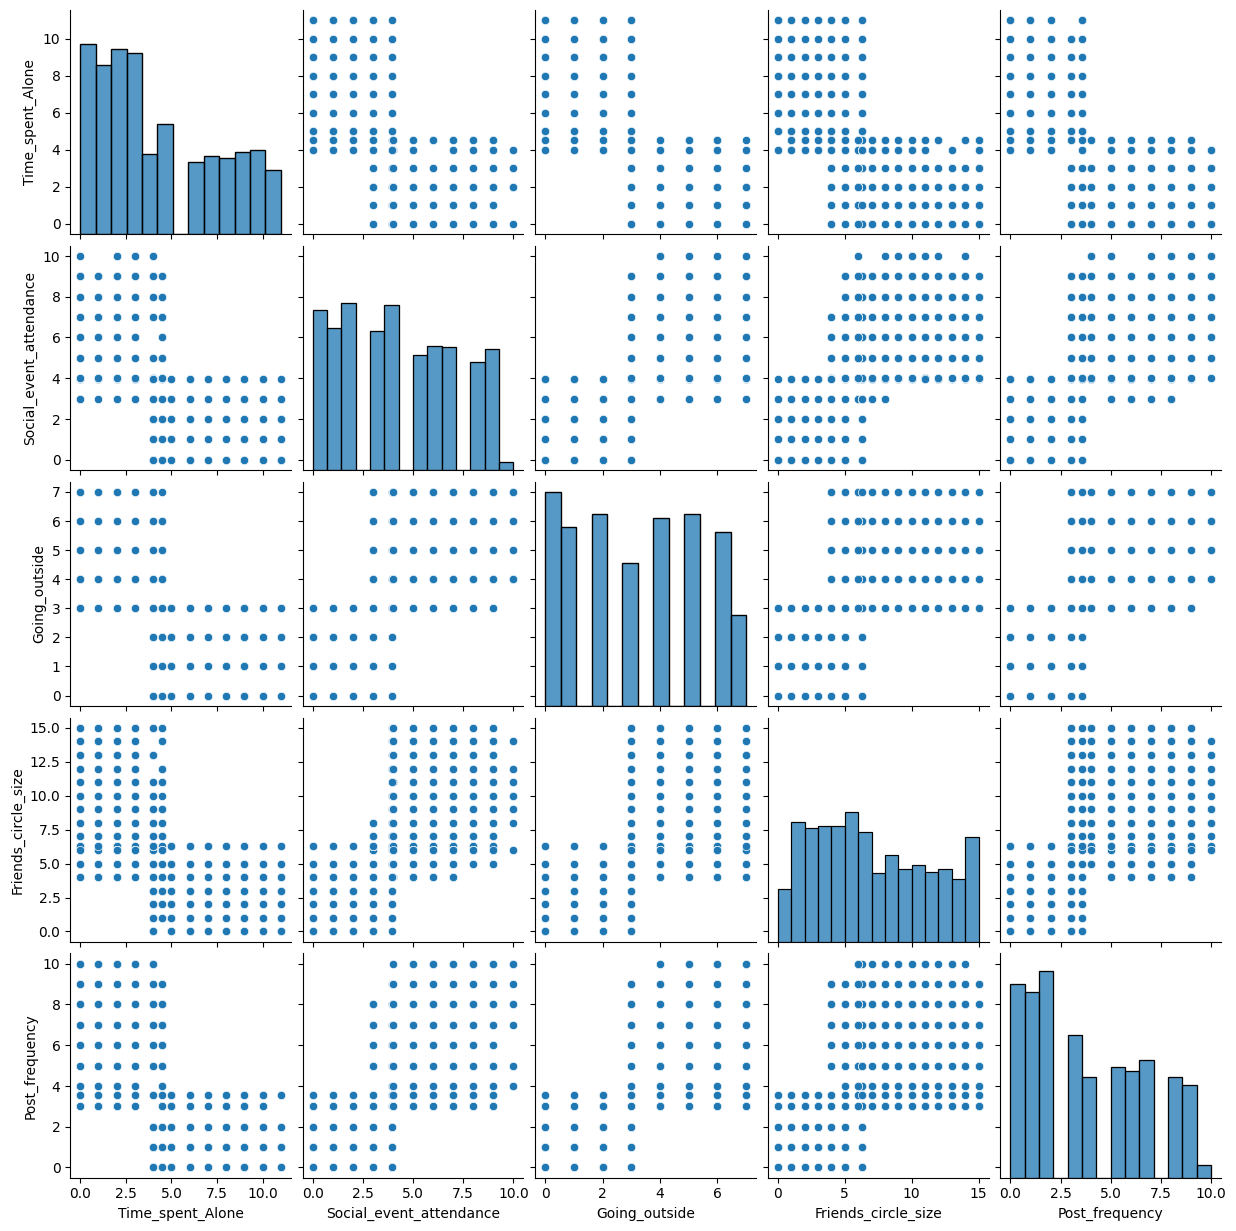

In [19]:
sns.pairplot(df)

<Axes: >

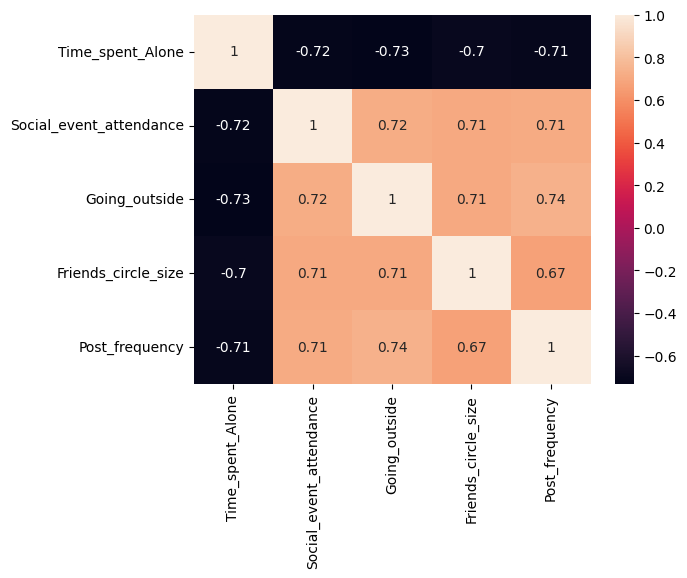

In [20]:

sns.heatmap(df.corr(numeric_only=True),annot=True)

In [21]:
from sklearn.preprocessing import LabelEncoder


In [22]:
le= LabelEncoder()
df['Personality']=le.fit_transform(df['Personality'])


In [23]:
df['Drained_after_socializing']=le.fit_transform(df['Drained_after_socializing'])
df['Stage_fear']=le.fit_transform(df['Stage_fear'])

In [24]:
df

,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
0,4.0,0,4.0,6.0,0,13.0,5.000000,0
1,9.0,1,0.0,0.0,1,0.0,3.000000,1
2,9.0,1,1.0,2.0,1,5.0,2.000000,1
3,0.0,0,6.0,7.0,0,14.0,8.000000,0
4,3.0,0,9.0,4.0,0,8.0,5.000000,0
...,...,...,...,...,...,...,...,...
2894,0.0,0,9.0,3.0,0,12.0,3.564727,0
2896,3.0,0,8.0,3.0,0,14.0,9.000000,0
2897,4.0,1,1.0,1.0,1,4.0,0.000000,1
2898,11.0,1,1.0,3.0,1,2.0,0.000000,1


In [25]:
x= df.drop('Personality',axis=1)
y= df['Personality']

In [26]:
#train test split

from sklearn.model_selection import train_test_split

In [27]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [28]:
# feature scaling
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train_s=sc.fit_transform(x_train)
x_test_s=sc.transform(x_test)

In [29]:
# feature selection
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
selector=SelectKBest(f_classif,k=5)
x_train_kbest=selector.fit_transform(x_train_s,y_train)
x_test_kbest=selector.transform(x_test_s)

In [30]:
 #classification model
 model=LogisticRegression()
 model.fit(x_train_kbest,y_train)

LogisticRegression()

In [31]:
# predict
y_pred = model.predict(x_test_kbest)

In [32]:
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

0.902
[[251  28]
 [ 21 200]]
              precision    recall  f1-score   support

           0       0.92      0.90      0.91       279
           1       0.88      0.90      0.89       221

    accuracy                           0.90       500
   macro avg       0.90      0.90      0.90       500
weighted avg       0.90      0.90      0.90       500



In [33]:
# save and load model
import joblib
joblib.dump(model,'model.pkl')
loaded_model=joblib.load('model.pkl')

In [34]:
#hyperparameter tuning
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
param = {'C':[0.1,1,10],'solver':['liblinear']}
grid = GridSearchCV(LogisticRegression(),param,cv=5)
grid.fit(x_train_kbest,y_train)
print(grid.best_params_)

{'C': 0.1, 'solver': 'liblinear'}


In [35]:
# again calculation the model
best_model = grid.best_estimator_
y_pred_best = best_model.predict(x_test_kbest)


In [36]:
#evaluate again
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

print("✅ Final Accuracy:", accuracy_score(y_test, y_pred_best))
print("\n📊 Confusion Matrix:\n", confusion_matrix(y_test, y_pred_best))
print("\n📝 Classification Report:\n", classification_report(y_test, y_pred_best))


✅ Final Accuracy: 0.906

📊 Confusion Matrix:
 [[251  28]
 [ 19 202]]

📝 Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.90      0.91       279
           1       0.88      0.91      0.90       221

    accuracy                           0.91       500
   macro avg       0.90      0.91      0.91       500
weighted avg       0.91      0.91      0.91       500



In [37]:
import joblib

# Save the best model (from GridSearch)
joblib.dump(best_model, 'best_model.pkl')
# Load model later (in another file or session)
model = joblib.load('best_model.pkl')

# Predict as usual
y_pred = model.predict(x_test_kbest)

In [38]:
# new input
import numpy as np
#Feature names in correct order (based on original 7 features)
feature_names = [
    'Time_spent_Alone',
    'Stage_fear',
    'Social_event_attendance',
    'Going_outside',
    'Drained_after_socializing',
    'Friends_circle_size',
    'Post_frequency'
]

# Take input from user
print("🔹 Please enter the following values (numeric):")
user_input = []
for feature in feature_names:
    value = float(input(f"Enter {feature}: "))
    user_input.append(value)

# Convert to 2D list for model
new_input = [user_input]
# Step 1: Scale
new_input_scaled = sc.transform(new_input)

# Step 2: Select top features
new_input_kbest = selector.transform(new_input_scaled)

# Step 3: Load the saved model
model = joblib.load('best_model.pkl')

# Step 4: Predict
prediction = model.predict(new_input_kbest)

# Step 5: Decode label to original class
predicted_label = le.inverse_transform(prediction)
mapping = {'Yes': 'Introvert', 'No': 'Extrovert'}
final_label = mapping.get(predicted_label[0], predicted_label[0])  # fallback to original

print("🧠 Predicted Personality Type:", final_label)



🔹 Please enter the following values (numeric):
Enter Time_spent_Alone: 2
Enter Stage_fear: 0
Enter Social_event_attendance: 4
Enter Going_outside: 6
Enter Drained_after_socializing: 1
Enter Friends_circle_size: 8
Enter Post_frequency: 5
🧠 Predicted Personality Type: Extrovert


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
